In [1]:
from model import Model
import json
import os

/home/j1choi/Downloads/pyssem-main/pyssem/utils/simulation/scen_properties.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename


In [2]:
# Load simulation configuration
with open('./example-purdue.json') as f:
  simulation_data = json.load(f)

In [3]:
scenario_props = simulation_data['scenario_properties']

In [4]:
scenario_props

{'start_date': '01/03/2024',
 'simulation_duration': 100,
 'steps': 100000,
 'min_altitude': 515,
 'max_altitude': 900,
 'v_shells': 1650000,
 'launch_function': 'Lambda',
 'integrator': 'BDF',
 'density_model': 'static_exp_dens_func',
 'LC': 0.1,
 'v_imp': 10.0,
 'fragment_spreading': False,
 'parallel_processing': False,
 'basline': False}

In [5]:
# Create an instance of the Model with the simulation parameters
model = Model(
    start_date=scenario_props["start_date"].split("T")[0],  # Assuming date is in ISO format
    simulation_duration=scenario_props["simulation_duration"],
    steps=scenario_props["steps"],
    min_altitude=scenario_props["min_altitude"],
    max_altitude=scenario_props["max_altitude"],
    v_shells=scenario_props["v_shells"],
    launch_function=scenario_props["launch_function"],
    integrator=scenario_props["integrator"],
    density_model=scenario_props["density_model"],
    LC=scenario_props["LC"],
    v_imp=scenario_props["v_imp"],
    fragment_spreading = scenario_props["fragment_spreading"]
)

SHELL COUNT:  20
R0_km [515.         515.4945869  515.98822656 516.48092351 516.97268223
 517.46350717 517.95340277 518.44237339 518.9304234  519.41755713
 519.90377885 520.38909282 520.87350327 521.35701439 521.83963035
 522.32135527 522.80219326 523.28214839 523.7612247  524.23942621
 524.71675688]


In [6]:
species = simulation_data["species"]
species_list = model.configure_species(species)

Splitting species N into 2 species with masses [0.64, 223].
Added 1 active species, 2 debris species, and 0 rocket body species to the simulation.
Pairing the following active species to debris classes for PMD modeling...
['S']
Matched species S to debris species N_223kg.
    Name: N_0.64kg
    pmd_linked_species: []
    Name: N_223kg
    pmd_linked_species: ['S']


Creating collision pairs:   0%|                           | 0/6 [00:00<?, ?it/s]

Species pairing for  S N_0.64kg and sk  ['S', 'N_0.64kg', 'N_0.64kg', 'N_223kg']
pairing {'S'} {'N_0.64kg'}


Creating collision pairs:  17%|███▏               | 1/6 [00:00<00:01,  2.80it/s]

Species pairing for  S N_223kg and sk  ['S', 'N_223kg', 'N_0.64kg', 'N_223kg']
pairing {'S'} {'N_223kg'}


Creating collision pairs:  33%|██████▎            | 2/6 [00:00<00:01,  3.07it/s]

Species pairing for  N_0.64kg N_223kg and sk  ['N_0.64kg', 'N_223kg', 'N_0.64kg', 'N_223kg']
pairing {'N_0.64kg'} {'N_223kg'}


Creating collision pairs:  67%|████████████▋      | 4/6 [00:01<00:00,  3.95it/s]

Species pairing for  S S and sk  ['S', 'S', 'N_0.64kg', 'N_223kg']
pairing {'S'} {'S'}
Species pairing for  N_0.64kg N_0.64kg and sk  ['N_0.64kg', 'N_0.64kg', 'N_0.64kg', 'N_223kg']
pairing {'N_0.64kg'} {'N_0.64kg'}


Creating collision pairs: 100%|███████████████████| 6/6 [00:01<00:00,  4.35it/s]

Species pairing for  N_223kg N_223kg and sk  ['N_223kg', 'N_223kg', 'N_0.64kg', 'N_223kg']
pairing {'N_223kg'} {'N_223kg'}


In [7]:
# Run the model
results = model.run_model()

baseline
PER YEAR 31557600.0 1000.0
PER YEAR 31557600.0 1000.0
PER YEAR 31557600.0 1000.0
Conversion of equations to lambda functions...
x0             S   N_0.64kg   N_223kg
0   12.483654  29.173991  4.627431
1   12.599745  29.190041  4.642876
2    12.71626  29.205842  4.658287
3   12.833194  29.221394  4.673663
4   12.950542  29.236699  4.689003
5   13.068299  29.251756  4.704308
6   13.186461  29.266568  4.719577
7   13.305023  29.281135   4.73481
8   13.423981  29.295458  4.750006
9   13.543329  29.309538  4.765166
10  13.663062  29.323377  4.780289
11  13.783176  29.336976  4.795376
12  13.903666  29.350334  4.810425
13  14.024527  29.363454  4.825437
14  14.145754  29.376337  4.840412
15  14.267341  29.388983  4.855348
16  14.389285  29.401393  4.870247
17  14.511579  29.413568  4.885108
18  14.634219  29.425511  4.899931
19  14.757199   29.43722  4.914715
Integrating equations...
Model run completed successfully.


In [8]:
import numpy as np
np.shape(results.output.y)

(9, 100000)

In [ ]:
model.create_plots()

In [10]:
emresults = model.scenario_properties.run_euler_maruyama()

In [8]:
emresults_list = []
#emresults_list.append(emresults)

In [9]:
for i in range(0, 20):
    print(i)
    emresults = model.scenario_properties.run_euler_maruyama()
    emresults_list.append(emresults)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [10]:
emresults_list=emresults_list[5:]

In [10]:
import numpy as np
np.shape(emresults_list)

(1, 9, 50000)

In [10]:
import numpy as np
emresults_avg = np.mean(emresults_list, axis = 0)
results.output.y =  emresults_avg#emresults_list[-1]

In [14]:
emresults_list[0]

array([[ 30.85419197,  30.90811971,  31.03438106, ...,  96.87824044,
         97.25790086,  97.39940106],
       [ 31.72687842,  31.68280602,  31.60277847, ...,  77.30261535,
         77.23935353,  77.25109697],
       [ 32.6089602 ,  32.48142494,  32.47619478, ...,  98.04005408,
         98.11395156,  98.20710414],
       ...,
       [ 11.25422023,  11.28262074,  11.31973926, ..., 228.68022899,
        228.90327705, 229.00731159],
       [ 11.36779281,  11.40100776,  11.38620253, ..., 127.91434945,
        127.88935331, 127.8252236 ],
       [ 11.48057415,  11.43321736,  11.42518521, ..., 208.85722626,
        208.81955514, 208.71893176]], shape=(9, 100000))

In [15]:
#model.create_plots()

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os

scenario_properties = model.scenario_properties
species_names = scenario_properties.species_names
num_shells = scenario_properties.n_shells
n_species = len(species_names)

# 여러 번 실행한 결과 리스트로부터 평균과 표준편차 계산
results_array = np.array(emresults_list)  # shape: (num_runs, n_species*num_shells, n_steps)
mean_results = np.mean(results_array, axis=0)
std_results = np.std(results_array, axis=0)

# 신뢰구간 (95%) 계산
ci_factor = 1.96 / np.sqrt(len(emresults_list))  # 95% CI for the mean
ci_results = ci_factor * std_results

output_t = scenario_properties.scen_times

os.makedirs('figures', exist_ok=True)

# Species 별 Shell 별 플롯 (with CI)
fig, axes = plt.subplots(1, n_species, figsize=(20, 6))

cmap = plt.cm.viridis
norm = plt.Normalize(vmin=0, vmax=num_shells - 1)
colors = [cmap(norm(sh)) for sh in range(num_shells)]

for species_index in range(n_species):
    ax = axes.flatten()[species_index]
    species_data_mean = mean_results[species_index * num_shells:(species_index + 1) * num_shells]
    species_data_ci = ci_results[species_index * num_shells:(species_index + 1) * num_shells]

    for shell_index in range(num_shells):
        mean_curve = species_data_mean[shell_index]
        ci_curve = species_data_ci[shell_index]
        color = colors[shell_index]

        ax.plot(output_t, mean_curve, color=color, label=f'Shell {shell_index + 1}')
        ax.fill_between(output_t, mean_curve - ci_curve, mean_curve + ci_curve, color=color, alpha=0.2)

    ax.set_title(f'{species_names[species_index]}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')

plt.suptitle('Species across All Shells with 95% CI')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('figures/species_all_shells_SDE.png')
plt.close(fig)

# 전체 객체 수 플롯 (Total Objects with CI)
plt.figure(figsize=(10, 6))

total_objects_all_species_mean = np.zeros_like(output_t)
total_objects_all_species_ci = np.zeros_like(output_t)

for i in range(n_species):
    start_idx = i * num_shells
    end_idx = start_idx + num_shells

    total_mean = np.sum(mean_results[start_idx:end_idx, :], axis=0)
    total_ci = np.sqrt(np.sum(ci_results[start_idx:end_idx, :] ** 2, axis=0))  # CI propagation assuming independence

    plt.plot(output_t, total_mean, label=f'{species_names[i]}')
    plt.fill_between(output_t, total_mean - total_ci, total_mean + total_ci, alpha=0.2)

    total_objects_all_species_mean += total_mean
    total_objects_all_species_ci += total_ci ** 2  # Variances add up

total_objects_all_species_ci = np.sqrt(total_objects_all_species_ci)

plt.plot(output_t, total_objects_all_species_mean, label='Total All Species', color='k', linewidth=2, linestyle='--')
plt.fill_between(output_t,
                 total_objects_all_species_mean - total_objects_all_species_ci,
                 total_objects_all_species_mean + total_objects_all_species_ci,
                 color='gray', alpha=0.2)

plt.xlabel('Time')
plt.ylabel('Total Number of Objects')
plt.title('Objects Over Time with 95% Confidence Interval')
plt.xlim(0, 100)
plt.legend()
plt.tight_layout()
plt.savefig('figures/total_objects_over_time_SDE.png')
plt.close()


In [1]:
import numpy as np
drag_impact[2995]


KeyboardInterrupt



In [9]:
arr = results.output.y
evo_list = []
evo_satellites = []
evo_debris = []
evo_derelicts = []
for i in range(0, model.scenario_properties.species_length):
    for j in range(0, model.scenario_properties.n_shells):
        if i == 0:
            evo_satellites.append(arr[j + model.scenario_properties.species_length*i, :])
        if i == 1:
            evo_debris.append(arr[j + model.scenario_properties.species_length*i, :])
        if i == 2:
            evo_derelicts.append(arr[j + model.scenario_properties.species_length*i, :])

evo_list.append(evo_satellites)
evo_list.append(evo_debris)
evo_list.append(evo_derelicts)

In [10]:
len(results.output.t)

1000

TIMES:  100 10000 0.01
baseline
S
650
N_0.64kg
300
N_223kg
450
S
650
N_0.64kg
300
N_223kg
450
[200.         433.33333333 666.66666667 900.        ]
[9139.3119 9726.0448 2981.9728]
TIMES:  100 10000 0.01
baseline
S
650
N_0.64kg
300
N_223kg
450
S
650
N_0.64kg
300
N_223kg
450
[200.         433.33333333 666.66666667 900.        ]
[9139.3119 9726.0448 2981.9728]
TIMES:  100 10000 0.01
baseline
S
650
N_0.64kg
300
N_223kg
450
S
650
N_0.64kg
300
N_223kg
450
[200.         433.33333333 666.66666667 900.        ]
[9139.3119 9726.0448 2981.9728]
TIMES:  100 10000 0.01
baseline
S
650
N_0.64kg
300
N_223kg
450
S
650
N_0.64kg
300
N_223kg
450
[200.         433.33333333 666.66666667 900.        ]
[9139.3119 9726.0448 2981.9728]


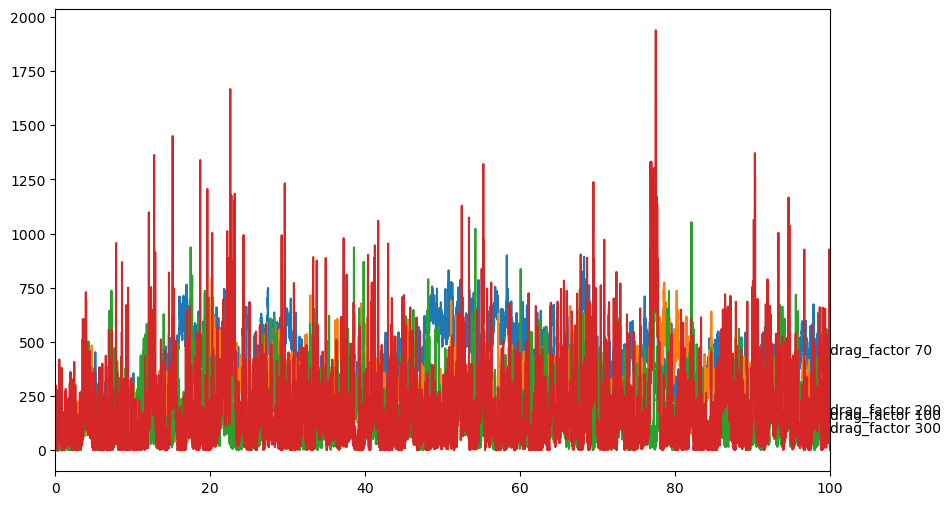

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
#results.output.t = np.interp(np.linspace(0, model.scenario_properties.simulation_duration, model.scenario_properties.simulation_duration*100).tolist(), 
#                                 range(model.scenario_properties.simulation_duration), results.output.t)
for drag_factor in range(0, 4):
    _, emresults = model.scenario_properties.run_euler_maruyama(max(70, drag_factor*100))
    output = results.output

    arr = results.output.y
    evo_list = []
    evo_satellites = []
    evo_debris = []
    evo_derelicts = []
    for i in range(0, model.scenario_properties.species_length):
        for j in range(0, model.scenario_properties.n_shells):
            if i == 0:
                evo_satellites.append(arr[j + model.scenario_properties.species_length*i, :])
            if i == 1:
                evo_debris.append(arr[j + model.scenario_properties.species_length*i, :])
            if i == 2:
                evo_derelicts.append(arr[j + model.scenario_properties.species_length*i, :])
        
    plt.plot(output.t, sum(evo_derelicts,0))
    plt.text(output.t[-1], sum(evo_derelicts,0)[-1], f'drag_factor {max(70, drag_factor*100)}')
    plt.xlim(0, 100)
#plt.ylim(0, 10)

(0.0, 100.0)

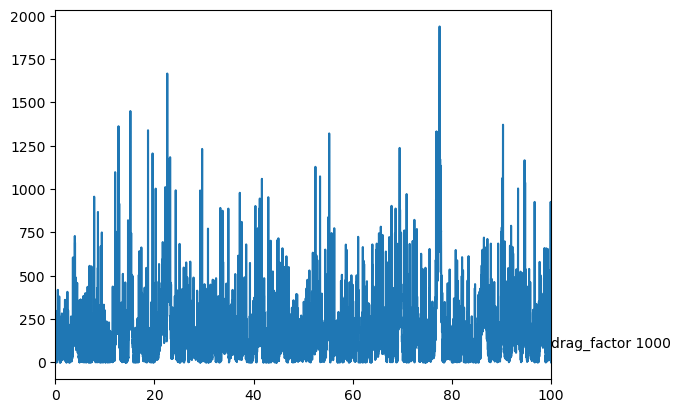

In [25]:
plt.plot(output.t, sum(evo_derelicts,0))
plt.text(output.t[-1], sum(evo_derelicts,0)[-1], f'drag_factor {10**drag_factor}')
plt.xlim(0, 100)

(0.0, 100.0)

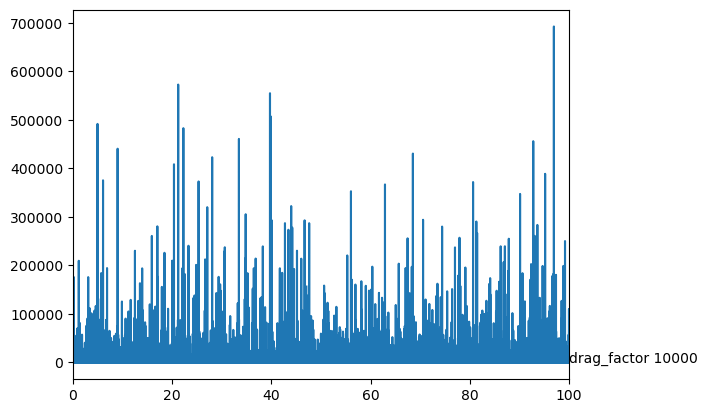

In [20]:
plt.plot(output.t, sum(evo_derelicts,0))
plt.text(output.t[-1], sum(evo_derelicts,0)[-1], f'drag_factor {10**drag_factor}')
plt.xlim(0, 100)

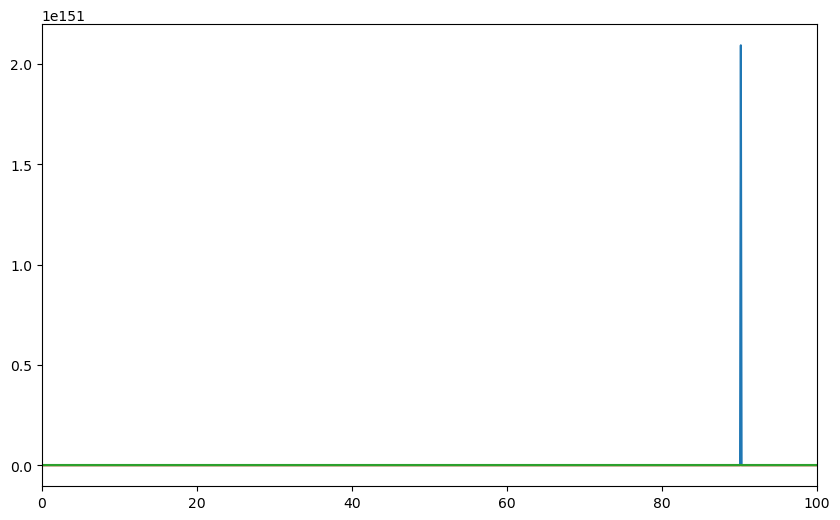

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
results.output.t = np.interp(np.linspace(0, model.scenario_properties.simulation_duration, model.scenario_properties.simulation_duration*100).tolist(), 
                                 range(model.scenario_properties.simulation_duration), results.output.t)
for drag_factor in range(1, 5):
    _, emresults = model.scenario_properties.run_euler_maruyama(drag_factor)
    output = results.output

    arr = results.output.y
    evo_list = []
    evo_satellites = []
    evo_debris = []
    evo_derelicts = []
    for i in range(0, model.scenario_properties.species_length):
        for j in range(0, model.scenario_properties.n_shells):
            if i == 0:
                evo_satellites.append(arr[j + model.scenario_properties.species_length*i, :])
            if i == 1:
                evo_debris.append(arr[j + model.scenario_properties.species_length*i, :])
            if i == 2:
                evo_derelicts.append(arr[j + model.scenario_properties.species_length*i, :])
        
    plt.plot(output.t, sum(evo_derelicts,0))
    plt.text(output.t[-1], sum(evo_derelicts,0)[-1], f'drag_factor {drag_factor}')
    plt.xlim(0, 100)
#plt.ylim(0, 10)

In [8]:
species_data = []
for species_index in range(0,3):
    #species_data = sum(output.y[species_index * 20:(species_index + 1) * 20, shell_idx])
    species_data.append(results.output.y[species_index * 20:(species_index + 1) * 20, -1])

In [9]:
species_data

[array([4740.65555384, 4871.76026132, 4957.56945335, 4995.54433657,
        4984.55120194, 4924.73773755, 4817.724893  , 4666.59819552,
        4475.55376091, 4249.90274901, 3995.87948663, 3720.12642367,
        3430.20840725, 3132.91446461, 2834.08470587, 2539.79983853,
        2254.30466023, 1981.44746283, 1724.80851795, 1486.94575104]),
 array([5.19242136e-01, 1.29242630e+00, 2.90351316e+00, 5.93650475e+00,
        1.09579372e+01, 2.02161405e+01, 3.65443988e+01, 6.28914347e+01,
        1.04989098e+02, 1.69774703e+02, 2.63289348e+02, 3.92494318e+02,
        5.32032671e+02, 6.52843892e+02, 7.42196808e+02, 7.27380923e+02,
        6.52306222e+02, 5.59765099e+02, 4.26357208e+02, 2.67092149e+02]),
 array([  2.7685002 ,   6.54253251,  13.85788909,  26.49857508,
         45.32064617,  76.63787765, 125.47558677, 193.10744462,
        284.40653431, 400.41532268, 534.77551954, 682.73346397,
        800.80975629, 869.75711743, 902.87412592, 868.11761682,
        801.35913   , 728.19656961, 635.

In [9]:
em_species_data = []
for species_index in range(0,3):
    #species_data = sum(output.y[species_index * 20:(species_index + 1) * 20, shell_idx])
    em_species_data.append(emresults[species_index * 20:(species_index + 1) * 20, 99])
em_species_data

[array([176.60977436, 221.5013561 , 275.43886821, 338.33313879,
        409.27984533, 486.0238747 , 565.2299443 , 643.38215147,
        714.89622858, 775.15908625, 820.06079471, 845.91522661,
        850.09331404, 832.57420184, 794.36714918, 737.92780729,
        667.59677067, 588.39708566, 504.85542184, 421.93857857]),
 array([ 1.62906706,  4.66006407,  7.08864125, 10.97480007, 19.35692438,
        28.43196152, 46.46747954, 39.21765261, 31.65739497, 19.8581897 ,
        10.63775606,  2.27971297,  0.93351531,  0.29125867,  0.14581976,
         0.39876965,  0.22712481,  0.31247742,  0.08559025,  0.12383334]),
 array([  1.49829848,  13.18667883,  24.82753056,  39.40334801,
         61.07145826,  76.6474316 , 105.47284442, 105.65961701,
        114.81111849, 110.84773646, 103.36043061,  88.00724256,
         78.94808329,  68.93172973,  55.22402379,  44.33634996,
         34.82193663,  27.09599359,  19.29797962,  14.18552816])]

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os

scenario_properties = model.scenario_properties
species_names = scenario_properties.species_names
num_shells = scenario_properties.n_shells
n_species = len(species_names)

# 여러 번 실행한 결과 리스트로부터 평균과 표준편차 계산
results_array = np.array(results_list)  # shape: (num_runs, n_species*num_shells, n_steps)
mean_results = np.mean(results_array, axis=0)
std_results = np.std(results_array, axis=0)

# 신뢰구간 (95%) 계산
ci_factor = 1.96 / np.sqrt(len(results_list))  # 95% CI for the mean
ci_results = ci_factor * std_results

output_t = scenario_properties.scen_times

os.makedirs('figures', exist_ok=True)

# Species 별 Shell 별 플롯 (with CI)
fig, axes = plt.subplots(1, n_species, figsize=(20, 6))

cmap = plt.cm.viridis
norm = plt.Normalize(vmin=0, vmax=num_shells - 1)
colors = [cmap(norm(sh)) for sh in range(num_shells)]

for species_index in range(n_species):
    ax = axes.flatten()[species_index]
    species_data_mean = mean_results[species_index * num_shells:(species_index + 1) * num_shells]
    species_data_ci = ci_results[species_index * num_shells:(species_index + 1) * num_shells]

    for shell_index in range(num_shells):
        mean_curve = species_data_mean[shell_index]
        ci_curve = species_data_ci[shell_index]
        color = colors[shell_index]

        ax.plot(output_t, mean_curve, color=color, label=f'Shell {shell_index + 1}')
        ax.fill_between(output_t, mean_curve - ci_curve, mean_curve + ci_curve, color=color, alpha=0.2)

    ax.set_title(f'{species_names[species_index]}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')

plt.suptitle('Species across All Shells with 95% CI')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('figures/species_all_shells.png')
plt.close(fig)

# 전체 객체 수 플롯 (Total Objects with CI)
plt.figure(figsize=(10, 6))

total_objects_all_species_mean = np.zeros_like(output_t)
total_objects_all_species_ci = np.zeros_like(output_t)

for i in range(n_species):
    start_idx = i * num_shells
    end_idx = start_idx + num_shells

    total_mean = np.sum(mean_results[start_idx:end_idx, :], axis=0)
    total_ci = np.sqrt(np.sum(ci_results[start_idx:end_idx, :] ** 2, axis=0))  # CI propagation assuming independence

    plt.plot(output_t, total_mean, label=f'{species_names[i]}')
    plt.fill_between(output_t, total_mean - total_ci, total_mean + total_ci, alpha=0.2)

    total_objects_all_species_mean += total_mean
    total_objects_all_species_ci += total_ci ** 2  # Variances add up

total_objects_all_species_ci = np.sqrt(total_objects_all_species_ci)

plt.plot(output_t, total_objects_all_species_mean, label='Total All Species', color='k', linewidth=2, linestyle='--')
plt.fill_between(output_t,
                 total_objects_all_species_mean - total_objects_all_species_ci,
                 total_objects_all_species_mean + total_objects_all_species_ci,
                 color='gray', alpha=0.2)

plt.xlabel('Time')
plt.ylabel('Total Number of Objects')
plt.title('Objects Over Time with 95% Confidence Interval')
plt.xlim(0, 100)
plt.legend()
plt.tight_layout()
plt.savefig('figures/total_objects_over_time.png')
plt.close()


In [25]:
# Plot heatmap for each species
n_time_points = len(output["t"])
cols = 3
rows = np.ceil(n_species / cols).astype(int)

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(12, rows * 6))
for i, species_name in enumerate(species_names):
    row = i // cols
    col = i % cols
    ax = axs[row, col] if rows > 1 else axs[col]

    start_idx = i * num_shells
    end_idx = start_idx + num_shells
    data_per_species = output["y"][start_idx:end_idx, :]

    cax = ax.imshow(data_per_species, aspect='auto', origin='lower',
                    extent=[output["t"][0], output["t"][-1], 0, num_shells],
                    interpolation='nearest')
    fig.colorbar(cax, ax=ax, label='Number of Objects')
    ax.set_xlabel('Time')
    ax.set_ylabel('Orbital Shell')
    ax.set_title(species_name)
    ax.set_xticks(np.linspace(output["t"][0], output["t"][-1], num=5))
    ax.set_yticks(np.arange(0, num_shells, 5))
    ax.set_yticklabels([f'{alt:.0f}' for alt in scenario_properties.HMid[::5]])

for i in range(n_species, rows * cols):
    if rows == 1:
        fig.delaxes(axs[i])
    else:
        axs.flatten()[i].set_visible(False)

plt.tight_layout()
plt.savefig('figures/heatmaps_species.png')
plt.close(fig)

In [10]:
tuple([[1, 2], [3, 4]])

([1, 2], [3, 4])

In [ ]:
model.scenario_properties.x0

In [ ]:
print(np.shape(results.output.y))
print(np.shape(results.output.y[:,0]))
print(results.output.y[:,0])
J = J_eqn(eqn)
#lam0 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
lam0 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
output = J(lam0)

In [9]:
eqn = model.scenario_properties.get_eqn()

equation flattened  [-22.4428026132*pi*N_0p64kg_1*S_1 - 71.4622483152*pi*N_223kg_1*S_1 - 0.07006102776*pi*S_1**2 - 0.2*S_1 + lam_0, -22.4428026132*pi*N_0p64kg_2*S_2 - 71.4622483152*pi*N_223kg_2*S_2 - 0.07006102776*pi*S_2**2 - 0.2*S_2 + lam_1, -22.4428026132*pi*N_0p64kg_3*S_3 - 71.4622483152*pi*N_223kg_3*S_3 - 0.07006102776*pi*S_3**2 - 0.2*S_3 + lam_2, -22.4428026132*pi*N_0p64kg_4*S_4 - 71.4622483152*pi*N_223kg_4*S_4 - 0.07006102776*pi*S_4**2 - 0.2*S_4 + lam_3, -22.4428026132*pi*N_0p64kg_5*S_5 - 71.4622483152*pi*N_223kg_5*S_5 - 0.07006102776*pi*S_5**2 - 0.2*S_5 + lam_4, -22.4428026132*pi*N_0p64kg_6*S_6 - 71.4622483152*pi*N_223kg_6*S_6 - 0.07006102776*pi*S_6**2 - 0.2*S_6 + lam_5, -22.4428026132*pi*N_0p64kg_7*S_7 - 71.4622483152*pi*N_223kg_7*S_7 - 0.07006102776*pi*S_7**2 - 0.2*S_7 + lam_6, -22.4428026132*pi*N_0p64kg_8*S_8 - 71.4622483152*pi*N_223kg_8*S_8 - 0.07006102776*pi*S_8**2 - 0.2*S_8 + lam_7, -22.4428026132*pi*N_0p64kg_9*S_9 - 71.4622483152*pi*N_223kg_9*S_9 - 0.07006102776*pi*S_9**2

In [9]:
import numpy as np
np.linspace(200, 900, 20)

array([200.        , 236.84210526, 273.68421053, 310.52631579,
       347.36842105, 384.21052632, 421.05263158, 457.89473684,
       494.73684211, 531.57894737, 568.42105263, 605.26315789,
       642.10526316, 678.94736842, 715.78947368, 752.63157895,
       789.47368421, 826.31578947, 863.15789474, 900.        ])

In [39]:
from math import pi
R0 = [200]
V=2e8
while R0[-1] < 900:
    R0.append((3/4*(1/pi)*V+R0[-1]**3)**(1/3))

In [41]:
R0

[200,
 382.0080289595773,
 469.50145696450033,
 532.7887286728846,
 583.8134878830665,
 627.203880017098,
 665.3008212288855,
 699.4726507724467,
 730.5967869077348,
 759.27351303416,
 785.9337229539163,
 810.8984149291728,
 834.4138954752912,
 856.6737742529706,
 877.8333237406648,
 898.0192008473468,
 917.3362325650183]

In [13]:
from utils.launch.launch import launch_sensitivity
lase = launch_sensitivity(model.scenario_properties.HMid, model.scenario_properties, 300, 200**2, 1100)
#print(model.scenario_properties.deltaH)

[200. 235. 270. 305. 340. 375. 410. 445. 480. 515. 550. 585. 620. 655.
 690. 725. 760. 795. 830. 865. 900.]
[9.8973820e+02 1.0755264e+03 1.0993127e+03 1.0568684e+03 9.5569660e+02
 8.1286530e+02 6.5030430e+02 4.8934390e+02 3.4634680e+02 2.3057250e+02
 1.4437880e+02 8.5035200e+01 4.7107900e+01 2.4546400e+01 1.2030400e+01
 5.5459000e+00 2.4047000e+00 9.8080000e-01 3.7620000e-01 1.3580000e-01]


In [11]:
def max_yr_sat(result):
    species_data = []
    for species_index in range(0,1):
        species_data.append(sum(result.y[species_index * 20:(species_index + 1) * 20, :]))
    species_data = species_data[0]
    for i in range(0, len(species_data)-1):
        if species_data[i] > species_data[i+1]:
            print(i, species_data[i])
            break

In [53]:
def launch_sensitivity_test(model, equations):
    #lam = symbols(f'lam_:{model.scenario_properties.n_shells}')
    #species_list = [species for group in model.scenario_properties.species.values() for species in group]
    res_list = []
    J = J_eqn(equations)
    for h in model.scenario_properties.HMid[0:9]:
        full_lambda = []
        for lam0 in [1000, 1500, 2000, 2500, 3000, 3500, 4000]:
            print(h, lam0)
            lambda_expr = launch_sensitivity(model.scenario_properties.HMid, model.scenario_properties, h, 300**2, lam0)
    
            res = J(lambda_expr[:, 0])
            
            res_list.append([h, lam0, res])
            print(res_list)
        #res_list.append(output)
    return res_list
        #dN_dt[i] = equations[i](*N).subs(lam[i], dN_dt[i])
            

In [54]:
from utils.launch.launch import launch_sensitivity
res_list = launch_sensitivity_test(model, eqn)

217.5 1000
[[217.5, 1000, 26.359862313055235]]
217.5 1500
[[217.5, 1000, 26.359862313055235], [217.5, 1500, 17.575286365586024]]
217.5 2000
[[217.5, 1000, 26.359862313055235], [217.5, 1500, 17.575286365586024], [217.5, 2000, 13.182754743055115]]
217.5 2500
[[217.5, 1000, 26.359862313055235], [217.5, 1500, 17.575286365586024], [217.5, 2000, 13.182754743055115], [217.5, 2500, 10.547482590397868]]
217.5 3000
[[217.5, 1000, 26.359862313055235], [217.5, 1500, 17.575286365586024], [217.5, 2000, 13.182754743055115], [217.5, 2500, 10.547482590397868], [217.5, 3000, 8.790916864793687]]
217.5 3500
[[217.5, 1000, 26.359862313055235], [217.5, 1500, 17.575286365586024], [217.5, 2000, 13.182754743055115], [217.5, 2500, 10.547482590397868], [217.5, 3000, 8.790916864793687], [217.5, 3500, 7.535835982043411]]
217.5 4000
[[217.5, 1000, 26.359862313055235], [217.5, 1500, 17.575286365586024], [217.5, 2000, 13.182754743055115], [217.5, 2500, 10.547482590397868], [217.5, 3000, 8.790916864793687], [217.5, 35

In [55]:
res_list

[[217.5, 1000, 26.359862313055235],
 [217.5, 1500, 17.575286365586024],
 [217.5, 2000, 13.182754743055115],
 [217.5, 2500, 10.547482590397868],
 [217.5, 3000, 8.790916864793687],
 [217.5, 3500, 7.535835982043411],
 [217.5, 4000, 6.594713923387581],
 [252.5, 1000, 23.31771159173259],
 [252.5, 1500, 15.547818666383403],
 [252.5, 2000, 11.66294422181887],
 [252.5, 2500, 9.332090274187584],
 [252.5, 3000, 7.7780834737261095],
 [252.5, 3500, 6.668266946186236],
 [252.5, 4000, 5.836144873681682],
 [287.5, 1000, 20.973518906210497],
 [287.5, 1500, 13.98593854772746],
 [287.5, 2000, 10.492334863522148],
 [287.5, 2500, 8.396318386741802],
 [287.5, 3000, 6.9991197155985825],
 [287.5, 3500, 6.001209624967484],
 [287.5, 4000, 5.252940643078371],
 [322.5, 1000, 19.164082468000082],
 [322.5, 1500, 12.781068424500564],
 [322.5, 2000, 9.5899371623623],
 [322.5, 2500, 7.675580962611535],
 [322.5, 3000, 6.39966850782411],
 [322.5, 3500, 5.488552517533305],
 [322.5, 4000, 4.805571256221459],
 [357.5, 100

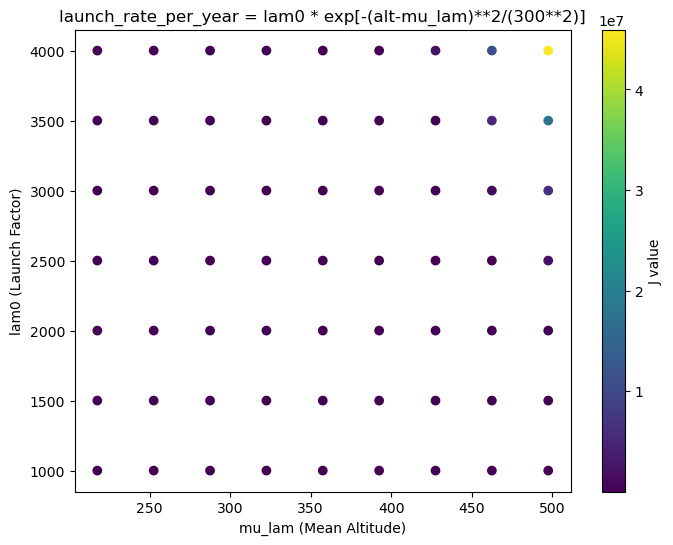

In [61]:
import numpy as np
import matplotlib.pyplot as plt

data = res_list

# list to numpy
data = np.array(data)

# X, Y, color Z
x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

# Heatmap
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=z, cmap='viridis')
plt.colorbar(label='J value')
plt.xlabel('mu_lam (Mean Altitude)')
plt.ylabel('lam0 (Launch Factor)')
plt.title('launch_rate_per_year = lam0 * exp[-(alt-mu_lam)**2/(300**2)]')
plt.show()


In [ ]:
equations = eqn
for h in [model.scenario_properties.HMid[-1]]:
    full_lambda = []
    lam0 = 1000
    for i, species in enumerate(model.scenario_properties.species):  
        lambda_expr = launch_sensitivity(model.scenario_properties.HMid, model.scenario_properties, h, 300**2, lam0)
        full_lambda.append(lambda_expr)

    
    
    full_lambda_flattened = []

    for i in range(len(full_lambda)):
        if full_lambda[i] is not None:
            full_lambda_flattened.extend(full_lambda[i])
        else:
            # Append None to the list, length of scenario_properties.n_shells
            full_lambda_flattened.extend([None]*model.scenario_properties.n_shells)
            
    output = solve_ivp(model.scenario_properties.population_shell, [model.scenario_properties.scen_times[0], model.scenario_properties.scen_times[-1]],
           model.scenario_properties.x0.T.values.flatten(), args=(full_lambda_flattened, equations, model.scenario_properties.scen_times), t_eval=model.scenario_properties.scen_times, method='BDF')


In [9]:
def S_eq(shell_idx, equations, lam):
    full_lambda = []
    for i, species in enumerate(model.scenario_properties.species):
        lambda_expr = np.array([[lam_shell]*100 for lam_shell in lam])
        full_lambda.append(lambda_expr)
        
    full_lambda_flattened = []
    for i in range(len(full_lambda)):
        full_lambda_flattened.extend(full_lambda[i])
    
    #x0 = model.scenario_properties.x0.T.values.flatten()
    x0 = [0.0]*60

    output = solve_ivp(model.scenario_properties.population_shell, 
                       [model.scenario_properties.scen_times[0], model.scenario_properties.scen_times[-1]],
                       x0, args=(full_lambda_flattened, equations, model.scenario_properties.scen_times), 
                       t_eval=model.scenario_properties.scen_times, method='BDF')

    for species_index in range(0,1):
        #species_data = sum(output.y[species_index * 20:(species_index + 1) * 20, shell_idx])
        if np.shape(output.y)[1]!=100:
            print(np.shape(output.y))
        species_data = output.y[species_index * 20:(species_index + 1) * 20, 99][shell_idx]

    return species_data


In [10]:
def S_nc(shell_idx, lam):
    deltat = 5
    return lam[shell_idx] * deltat

In [11]:
def J_eqn(equations):
    def obj(lam):
        res = 0
        S_tot_eq = 0
        for i in range(0, 20):
            s_nc = S_nc(i, lam)
            s_eq = S_eq(i, equations, lam)
            if (s_nc-s_eq)/s_nc < 0.07:
                res+=0
            else:
                res += s_nc - s_eq
            S_tot_eq += s_eq
        return 1e6/(S_tot_eq) + 1e3*res
    return obj
        

In [100]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import solve_ivp

lb = [70]*20
ub = [999925.159, 999796.5873, 999447.2601, 998498.9228, 995930.1472, 989013.8265, 970689.8211, 924147.1301, 817587.246, 622485.759, 377584.241, 182482.754, 75922.86995, 29380.1789, 11056.17354, 330, 150, 130, 100, 70]
bounds=[]
for i in range(0, 20):
    bounds.append((lb[i],ub[i]))

# Initial guess for lambda
initial_lambda = np.array([1e4/(1.5**i) for i in range(0, 20)])#np.full(20, 100)

# The objective function to minimize
objective_function = J_eqn(eqn)


# 콜백 함수 정의
def callback_function(xk):
    # 목적 함수 값 계산
    current_value = objective_function(xk)

    # 중간 결과를 저장할 리스트
    intermediate_values = []
    
    # 중간 결과를 리스트에 추가
    intermediate_values.append(current_value)
    
    # 현재 반복 단계에서의 lambda 값과 목적 함수 값을 출력
    print(f"Current lambda: {xk}")
    print(f"Current objective value: {current_value}")

# Running the optimization
result = minimize(objective_function, initial_lambda, method='L-BFGS-B', bounds=bounds, options = {'maxiter': 1000, 'eps': 10}, callback=callback_function)

# Result of the optimization
optimal_lambda = result.x
optimal_value = result.fun

print("Optimal lambda:", optimal_lambda)
print("Optimal J value:", optimal_value)

Current lambda: [10000.00021726  6666.66688397  4444.44466175  2962.96318026
  1975.30885926  1316.87264526   877.91516926   585.27685186
   390.18464031   260.12316591   173.41551625   115.61041062
    77.07367738    70.00021625    70.00021626    70.0002165
    70.00021657    70.00021069    70.00021068    70.        ]
Current objective value: 6.594842702767241
Current lambda: [10808.11393252  7471.5587617   5245.32068671  3780.87668609
  2772.98158211  2125.86899627  1683.00576686  1388.99293475
  1199.53467377  1068.56433674   975.98474365   888.70081223
   912.66198286   848.88890671   849.61726436   330.
   150.           130.           100.            70.        ]
Current objective value: 4.681718394094187
Current lambda: [11648.12042544  8308.30839323  6078.14841095  4630.29153804
  3602.26315885  2965.79810261  2518.17017273  2221.83531256
  2035.81590149  1900.84778152  1798.10804763  1709.33629881
  1782.9508337   1615.04434709  1591.48348971   330.
   150.           130.     

In [12]:
def J_eqn_by_shell(equations, shell_idx, full_lam):
    def obj(lam):
        full_lam[shell_idx] = lam
        res = 0
        S_tot_eq = 0
        for i in range(0, 20):
            s_nc = S_nc(i, full_lam)
            s_eq = S_eq(i, equations, full_lam)
            if (s_nc-s_eq)/s_nc < 0.07:
                res+=0
            else:
                res += s_nc - s_eq
            S_tot_eq += s_eq
        return 1e6/(S_tot_eq) + 1e3*res
    return obj, full_lam
        

In [20]:
import numpy as np
from scipy.optimize import minimize
from pyswarm import pso
from scipy.integrate import solve_ivp


def callback_function(xk):
    # 목적 함수 값 계산
    current_value = objective_function(xk)

    # 중간 결과를 저장할 리스트
    intermediate_values = []
    
    # 중간 결과를 리스트에 추가
    intermediate_values.append(current_value)
    
    # 현재 반복 단계에서의 lambda 값과 목적 함수 값을 출력
    #print(f"Current lambda: {xk}")
    #print(f"Current objective value: {current_value}")

lb = [70]*20
ub = [999925.159, 999796.5873, 999447.2601, 998498.9228, 995930.1472, 989013.8265, 970689.8211, 924147.1301, 817587.246, 622485.759, 377584.241, 182482.754, 75922.86995, 29380.1789, 11056.17354, 330, 150, 130, 100, 71]


full_lambda = np.ones(20)

for shell_idx in range(19, -1, -1):
    initial_lambda = 100
    [objective_function, full_lambda] = J_eqn_by_shell(eqn, shell_idx, full_lambda)

    #bounds=[]
    #bounds.append((lb[shell_idx],ub[shell_idx]))

    #result = minimize(objective_function, initial_lambda, method='L-BFGS-B', bounds=bounds, options = {'maxiter': 1000, 'eps': 1}, callback=callback_function)
    optimal_lambda, optimal_value = pso(objective_function, [lb[shell_idx]], [ub[shell_idx]], swarmsize=100, maxiter=10)
    print("shell", shell_idx)
    print("Optimal lambda:", optimal_lambda)
    print("Optimal J value:", optimal_value)
    full_lambda[shell_idx] = optimal_lambda


KeyboardInterrupt: 

In [133]:
import numpy as np

# Given lambda for sensitivity analysis
lambda_value = np.full(20, 70)  # all lambda to 70 (lb)

# Sensitivity Analysis
def sensitivity_analysis(lambda_value, equations):
    epsilon = 1e-5  # marginal value
    sensitivity = np.zeros_like(lambda_value)
    
    for i in range(len(lambda_value)):
        # results for changes of epsilon on lambda[i]
        lambda_plus = np.copy(lambda_value)
        lambda_minus = np.copy(lambda_value)
        lambda_plus[i] += epsilon
        lambda_minus[i] -= epsilon
        
        # Compute obj fxn (or S_eq) for equations
        f_plus = J_eqn(equations)(lambda_plus)
        f_minus = J_eqn(equations)(lambda_minus)
        
        # sensitivity computation through central difference method
        sensitivity[i] = (f_plus - f_minus) / (2 * epsilon)
    
    return sensitivity

# sensitivity anlysis
sensitivity = sensitivity_analysis(lambda_value, eqn)

print("Sensitivity at given lambda:", sensitivity)

Sensitivity at given lambda: [-5111 -5111 -5111 -5111 -5111 -5111 -5111 -5111 -5110 -5109 -5108 -5107
 -5105 -5102 -5099 -5096 -5094 -5092 -5092 -5094]


In [107]:
def obj(model, shell): 
    deltat = 5
    S_eq = model.scenario_properties.all_symbolic_vars[shell]
    lamb = model.scenario_properties.all_symbolic_vars[-(model.scenario_properties.n_shells)+shell]
    S_nc = lamb/deltat
    obj = S_nc - S_eq

In [110]:
S_eq = solve_ivp(model.scenario_properties.population_shell, [model.scenario_properties.scen_times[0], model.scenario_properties.scen_times[-1]],
           model.scenario_properties.x0.T.values.flatten(), args=(full_lambda_flattened, equations, model.scenario_properties.scen_times), t_eval=model.scenario_properties.scen_times, method='BDF')


S_3 lam_2
S_3 lam_2/5


In [8]:
def S_eq_max(x):
    res = -27.40*(x**4) + 3267.18*(x**3) - 131311.78*(x**2) + 2378844.78*(x) + 1341902.83
    return res

In [9]:
S_eq_max(7)/(10**6)

12.61439441

In [9]:
launch_data = [765.4684208,  825.77413725, 866.90760776, 885.64951807, 880.4982683,
 851.86869888, 802.0369089 , 734.8413517,  655.19467529, 568.49240945,
 480.01689181, 394.42634007, 315.39357222, 245.42415565, 185.84860779,
 136.95530447,  98.21457519,  68.54102051,  46.54818261,  30.76326534]
# launch_data = [8.83564761e+05, 6.80277017e+05, 5.05118468e+05, 3.61710182e+05,
#  2.49797598e+05, 1.66370307e+05, 1.06862029e+05, 6.61958939e+04,
#  3.95456505e+04, 2.27838144e+04, 1.26594309e+04, 6.78362710e+03,
#  3.50565990e+03, 1.74718000e+03, 8.39780000e+02, 3.89272300e+02,
#  1.74020900e+02, 1.66418719e+02, 9.67351254e+01, 4.92964441e+01]
hmid = [217.5, 252.5, 287.5, 322.5, 357.5, 392.5, 427.5, 462.5, 497.5, 532.5, 567.5, 602.5,
 637.5, 672.5, 707.5, 742.5, 777.5, 812.5, 847.5, 882.5]

Text(0.5, 1.0, 'Launch Profile')

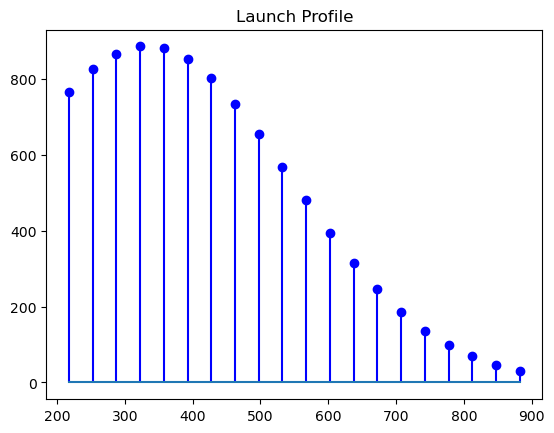

In [11]:
from matplotlib.pyplot import stem
import matplotlib.pyplot as plt
import numpy as np
stem(model.scenario_properties.HMid, launch_data, linefmt='b-', markerfmt='bo', basefmt='')
#plt.yscale("log")
plt.title("Launch Profile")

In [8]:
species_data = []
for species_index in range(0,1):
    species_data.append(sum(results.output.y[species_index * 20:(species_index + 1) * 20, :]))
species_data = species_data[0]
for i in range(0, len(species_data)-1):
    if species_data[i] > species_data[i+1]:
        print(i, species_data[i])
        break

53 55438.91212315943


In [8]:
model.create_plots()

Making plots


In [45]:
import pandas as pd
T = pd.read_csv(os.path.join('utils', 'launch', 'data', 'x0_launch_repeatlaunch_2018to2022_megaconstellationLaunches_Constellations.csv'))
#T['epoch_start_datime'] = T['epoch_start'].apply(lambda x: julian_to_datetime(x))

In [46]:
from datetime import datetime, timedelta
def julian_to_datetime(julian_date):
    # Julian Date for Unix epoch (1970-01-01)
    JULIAN_EPOCH = 2440587.5
    try:
        # Calculate the number of days from the Unix epoch
        days_from_epoch = julian_date - JULIAN_EPOCH
        # Create a datetime object for the Unix epoch and add the calculated days
        unix_epoch = datetime(1970, 1, 1)
        result_date = unix_epoch + timedelta(days=days_from_epoch)
        return result_date
    except OverflowError as e:
        # Handle dates that are out of range
        print(f"Date conversion error: {e}")
        return None

In [47]:
T['epoch_start_datime'] = T['epoch_start'].apply(lambda x: julian_to_datetime(x))
T['epoch_end_datime'] = T['epoch_end'].apply(lambda x: julian_to_datetime(x))

In [48]:
def define_object_class(T):
    """
    Define the object class of each object in the traffic model.
    Adds them to a new column named "obj_type" or overwrites the existing column.

    :param T: list of launches
    :type T: pandas.DataFrame
    """

    T['obj_class'] = "Unknown"

    # Classify Rocket Bodies
    T.loc[T['obj_type'] == 1, 'obj_class'] = "Rocket Body"

    # Classify Satellites
    T.loc[(T['obj_type'] == 2) & (T['stationkeeping'] != 0) & (T['stationkeeping'] < 5), 'obj_class'] = "Station-keeping Satellite"
    T.loc[(T['obj_type'] == 2) & (T['stationkeeping'] == 0), 'obj_class'] = "Non-station-keeping Satellite"
    T.loc[(T['obj_type'] == 2) & (T['stationkeeping'] == 5), 'obj_class'] = "Coordinated Satellite"
    T.loc[(T['obj_type'] == 2) & (T['stationkeeping'] == 6), 'obj_class'] = "Candidate Satellite"

    # Classify Debris
    T.loc[T['obj_type'].isin([3, 4]), 'obj_class'] = "Debris"

    # Count unclassified rows
    unclassed_rows = (T['obj_class'] == "Unknown").sum()
    if unclassed_rows > 0:
        print(f'\t{unclassed_rows} Unclassified rows remain.')

    return T
if 'obj_class' not in T.columns:
    T = define_object_class(T)  # Make sure this function is defined and imported

In [49]:
species_dict = {"Non-station-keeping Satellite": "S",
                    "Rocket Body": "B",
                    "Station-keeping Satellite": "S",
                    "Coordinated Satellite": "S",
                    "Debris": "N",
                    "Candidate Satellite": "C"}
T['species_class'] = T['obj_class'].map(species_dict)

In [50]:
parsed_date = datetime.strptime("01/03/2022", "%m/%d/%Y")
time_steps = [parsed_date + timedelta(days=365.25 * 1 * i) for i in range(100 + 1)]   

In [14]:
T

,adept_id,epoch_start,sma,ecc,inc,raan,aop,ma,epoch_end,obj_type,disp_option,stationkeeping,area,mass,size,weight,epoch_start_datime,epoch_end_datime,obj_class,species_class
0,5,2.436280e+06,8618.593000,0.184635,34.2506,135.992700,211.562500,135.992700,2.436280e+06,2,0,0,0.020106,1.46,0.160000,1,1958-03-17 00:00:00.000000,1958-03-17 00:00:00.000000,Non-station-keeping Satellite,S
1,11,2.436616e+06,8120.931000,0.146394,32.8628,282.264300,94.604200,282.264300,2.436616e+06,2,0,0,0.204300,9.71,0.510022,1,1959-02-17 00:00:00.000000,1959-02-17 00:00:00.000000,Non-station-keeping Satellite,S
2,12,2.436616e+06,8315.964000,0.166247,32.9137,59.745100,282.252100,59.745100,2.436616e+06,1,0,0,1.017091,22.79,1.137981,1,1959-02-17 00:00:00.000000,1959-02-17 00:00:00.000000,Rocket Body,B
3,16,2.436280e+06,8815.994000,0.202761,34.2718,155.033200,197.079200,155.033200,2.436280e+06,1,0,0,1.017091,22.79,1.137981,1,1958-03-17 00:00:00.000000,1958-03-17 00:00:00.000000,Rocket Body,B
4,20,2.436830e+06,8259.940000,0.166109,33.3414,209.987200,158.100000,209.987200,2.436830e+06,2,0,0,1.103524,67.39,1.185348,1,1959-09-18 00:00:00.000000,1959-09-18 00:00:00.000000,Non-station-keeping Satellite,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2142398,2178320,2.532632e+06,6863.680313,0.000001,55.0000,186.598342,133.273024,72.589862,2.535554e+06,2,0,5,12.566371,260.00,4.000000,1,2222-01-04 09:06:29.760751,2230-01-04 07:40:05.760786,Coordinated Satellite,S
2142399,2178321,2.532630e+06,6863.680313,0.000001,55.0000,26.538987,265.854121,178.615307,2.535551e+06,2,0,5,12.566371,260.00,4.000000,1,2222-01-02 00:06:19.152560,2230-01-01 22:39:55.152596,Coordinated Satellite,S
2142400,2178322,2.532630e+06,6978.809139,0.000001,55.0000,303.628443,36.913647,13.687663,2.535551e+06,2,0,5,12.566371,260.00,4.000000,1,2222-01-02 00:00:41.893637,2230-01-01 22:34:17.893632,Coordinated Satellite,S
2142401,2178323,2.532630e+06,6978.809139,0.000001,55.0000,271.864435,312.082824,247.201893,2.535552e+06,2,0,5,12.566371,260.00,4.000000,1,2222-01-02 21:40:33.436127,2230-01-02 20:14:09.436122,Coordinated Satellite,S


In [55]:
T[T.species_class == "S"].sort_values("epoch_start_datime")

,adept_id,epoch_start,sma,ecc,inc,raan,aop,ma,epoch_end,obj_type,disp_option,stationkeeping,area,mass,size,weight,epoch_start_datime,epoch_end_datime,obj_class,species_class
10377,40376,2.457054e+06,7060.623000,0.000106,98.1282,265.987100,94.145300,265.987100,2.459975e+06,2,0,3,9.605000,944.0,3.497065,1,2015-01-31 00:00:00.000000,2023-01-30 22:33:35.999995,Station-keeping Satellite,S
10378,40377,2.457054e+06,6827.711000,0.008416,99.0786,294.503000,66.502700,294.503000,2.459975e+06,2,0,3,0.040000,2.0,0.225676,1,2015-01-31 00:00:00.000000,2023-01-30 22:33:35.999995,Station-keeping Satellite,S
10379,40378,2.457054e+06,6827.351000,0.008408,99.0799,295.072100,65.928800,295.072100,2.459975e+06,2,0,3,0.040000,2.0,0.225676,1,2015-01-31 00:00:00.000000,2023-01-30 22:33:35.999995,Station-keeping Satellite,S
10380,40379,2.457054e+06,6858.712000,0.010490,99.0860,240.206500,120.952900,240.206500,2.459975e+06,2,0,3,0.075000,4.0,0.309019,1,2015-01-31 00:00:00.000000,2023-01-30 22:33:35.999995,Station-keeping Satellite,S
10381,40380,2.457054e+06,6873.076000,0.011511,99.0959,216.089300,144.801200,216.089300,2.459975e+06,2,0,3,0.075000,4.0,0.309019,1,2015-01-31 00:00:00.000000,2023-01-30 22:33:35.999995,Station-keeping Satellite,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090763,1126685,2.496107e+06,6903.725122,0.000001,53.0000,340.847804,52.548401,95.923585,2.499029e+06,2,0,5,12.566371,750.0,4.000000,1,2122-01-03 22:13:43.612618,2130-01-03 20:47:19.612614,Coordinated Satellite,S
1090774,1126696,2.496107e+06,6718.517879,0.000001,53.0000,253.388107,136.272203,55.887703,2.499029e+06,2,0,5,50.265482,1250.0,8.000000,1,2122-01-03 22:50:04.645810,2130-01-03 21:23:40.645805,Coordinated Satellite,S
1090880,1126802,2.496107e+06,7529.425267,0.000001,55.0000,55.942325,275.970315,282.643509,2.499029e+06,2,0,5,12.566371,260.0,4.000000,1,2122-01-03 23:08:59.909859,2130-01-03 21:42:35.909854,Coordinated Satellite,S
1090793,1126715,2.496107e+06,6728.529081,0.000001,38.0000,35.939682,67.382555,71.302845,2.499029e+06,2,0,5,50.265482,1250.0,8.000000,1,2122-01-03 23:46:15.268807,2130-01-03 22:19:51.268802,Coordinated Satellite,S


In [51]:
enddate = time_steps[-1]
startdate = time_steps[0]
T = T[(T.epoch_end_datime >= startdate)&(T.epoch_start_datime <= enddate)]

In [81]:
T = T[T.species_class == "S"]

(array([2.23460e+04, 2.87800e+03, 1.27522e+05, 1.41020e+04, 2.80041e+05,
        1.01700e+03, 2.06000e+02, 2.41000e+02, 1.48221e+05, 3.06000e+02]),
 array([  0.,  60., 120., 180., 240., 300., 360., 420., 480., 540., 600.]),
 <BarContainer object of 10 artists>)

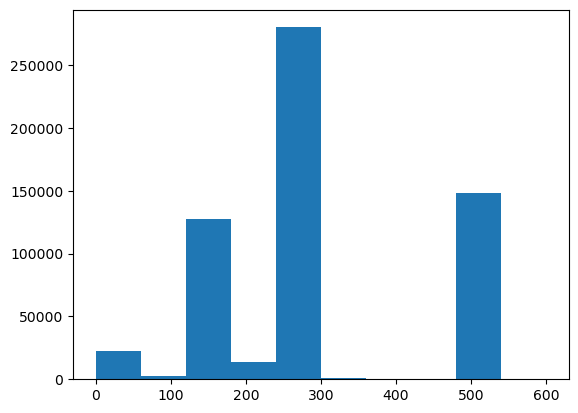

In [84]:
import matplotlib.pyplot as plt
plt.hist(Ttemp.mass)

In [7]:
# Run the model
results = model.run_model()

baseline
S
650
N_0.64kg
300
N_223kg
450
S lambda Expr:  3600
N_0.64kg lambda Expr:  3600
N_223kg lambda Expr:  3600
species_pair(S, N_0.64kg) Matrix([[-8.19208751169813e-8*pi*N_0.64kg_1*S_1, 1.86405785458195e-7*pi*N_0.64kg_1*S_1, 8.03145834480209e-8*pi*N_0.64kg_1*S_1]])
species_pair(S, N_223kg) Matrix([[-2.6085199877688e-7*pi*N_223kg_1*S_1, 2.54580500981331e-6*pi*N_223kg_1*S_1, 2.55737253702824e-7*pi*N_223kg_1*S_1]])
species_pair(N_0.64kg, N_223kg) Matrix([[0, 9.32028927290974e-7*pi*N_0.64kg_1*N_223kg_1, -8.03145834480209e-9*pi*N_0.64kg_1*N_223kg_1]])
species_pair(S, S) Matrix([[-2.55737253702824e-10*pi*S_1**2, 1.27290250490665e-5*pi*S_1**2, 0]])
species_pair(N_0.64kg, N_0.64kg) Matrix([[0, 4.33113230940192e-8*pi*N_0.64kg_1**2, 0]])
species_pair(N_223kg, N_223kg) Matrix([[0, 1.27290250490665e-5*pi*N_223kg_1**2, -2.55737253702824e-8*pi*N_223kg_1**2]])
EQUATION:  Matrix([[-8.19208751169813e-8*pi*N_0.64kg_1*S_1 - 2.6085199877688e-7*pi*N_223kg_1*S_1 - 2.55737253702824e-10*pi*S_1**2 - 0.1*S

In [8]:
model.create_plots()

Making plots


In [9]:
results.output

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 256
     njev: 3
      nlu: 32
      sol: None
   status: 0
  success: True
        t: array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
 

In [ ]:
n_species = model.scenario_properties.species_length
num_shells = model.scenario_properties.n_shells

In [20]:
results.output.y

array([[1.25414624e+02, 3.29900434e+04, 5.49246121e+04, ...,
        9.88084974e+04, 9.87796349e+04, 9.87283832e+04],
       [1.70851013e+02, 3.20475897e+04, 5.33216952e+04, ...,
        9.56916188e+04, 9.56208792e+04, 9.54953268e+04],
       [2.26498053e+02, 3.05269112e+04, 5.07472055e+04, ...,
        9.06380636e+04, 9.04848580e+04, 9.02132186e+04],
       ...,
       [2.51251489e+01, 4.87758075e+01, 9.06762016e+01, ...,
        5.02764022e+03, 5.15578100e+03, 5.28705032e+03],
       [1.84433270e+01, 3.64541836e+01, 6.65305701e+01, ...,
        3.09006761e+03, 3.15173674e+03, 3.21398224e+03],
       [1.31749031e+01, 2.65937098e+01, 4.76321052e+01, ...,
        1.72722212e+03, 1.75370053e+03, 1.78011474e+03]])

In [21]:
species_data = []

In [22]:
for species_index in range(0,1):
    species_data.append(results.output.y[species_index * 36:(species_index + 1) * 36, 60])

In [23]:
species_data

[array([9.87283832e+04, 9.54953268e+04, 9.02132186e+04, 8.30223679e+04,
        7.42439661e+04, 6.38923846e+04, 5.22855834e+04, 4.02151794e+04,
        2.84541313e+04, 1.81164848e+04, 1.02882228e+04, 5.33070198e+03,
        3.17441631e+03, 3.26141290e+03, 4.51611391e+03, 5.34893591e+03,
        4.69410947e+03, 3.59984668e+03, 2.60313556e+03, 1.80335319e+03,
        1.78122246e+03, 4.54739676e+03, 1.05119450e+04, 2.22001618e+04,
        4.25386050e+04, 8.20097430e+04, 1.56543082e+05, 2.89203423e+05,
        5.30711436e+05, 9.74049933e+05, 1.77548923e+06, 3.13710197e+06,
        4.30868203e+06, 2.84471024e+06, 1.02237313e+06, 2.96083929e+05])]

In [25]:
for species_index in range(0,1):
    species_data.append(sum(results.output.y[species_index * 20:(species_index + 1) * 20, :]))

In [26]:
species_data = []
for species_index in range(0,1):
    species_data.append(sum(results.output.y[species_index * 20:(species_index + 1) * 20, :]))
species_data = species_data[0]
for i in range(0, len(species_data)-1):
    if species_data[i] > species_data[i+1]:
        print(i, species_data[i])
        break

43 79749.16112866752


In [23]:
species_data

11312.130838506206

In [10]:
species_data

[array([11312.13083851, 25342.88737033, 36806.39142518, 46172.04165359,
        53823.39144217, 60073.9212981 , 65179.60999884, 69350.07996967,
        72756.71619907, 75539.2349724 , 77811.11717935, 79664.92713392,
        81177.4617655 , 82412.52616156, 83425.10455899, 84249.41041327,
        84925.79635032, 85477.68890085, 85921.92021063, 86287.37461662,
        86577.82232352, 86815.04059296, 87005.60860893, 87156.37987535,
        87278.38016253, 87379.59576951, 87449.22896711, 87503.79069067,
        87549.97779497, 87594.48713479, 87619.96313997, 87639.95383624,
        87658.66428956, 87679.54191246, 87691.61663191, 87699.85416969,
        87707.18436316, 87714.80265809, 87719.06050728, 87720.56186276,
        87720.73792542, 87719.8960795 , 87717.41167026, 87713.46499426,
        87708.66128876, 87703.21042812, 87697.32228668, 87691.20673879,
        87684.55480422, 87677.18306414, 87669.64584654, 87662.078816  ,
        87654.61763713, 87647.3979745 , 87640.16499329, 87632.28

In [10]:
species_data

[122203.76407364586, 25141.547346710035, 11740.690625657156]